<a href="https://colab.research.google.com/github/Sedowlas/EDA/blob/main/Super_market.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Идентификатор заказа => Уникальный идентификатор заказа для каждого клиента.  
Дата заказа => Дата заказа продукта.  
Дата доставки => Дата доставки товара.   
Режим доставки => Режим доставки, указанный клиентом.  
Идентификатор клиента => Уникальный идентификатор для идентификации каждого клиента.  
Имя клиента => Имя клиента.  
Сегмент => Сегмент, к которому принадлежит Клиент.  
Страна => Страна проживания клиента.  
Город => Город проживания Клиента.  
Штат => Штат проживания Клиента.  
Почтовый индекс => Почтовый индекс каждого клиента.  
Регион => Регион, к которому принадлежит Клиент.  
Идентификатор продукта => Уникальный идентификатор продукта.  
Категория => Категория заказанного товара.  
Подкатегория => Подкатегория заказанного товара.  
Название продукта => Название продукта  
Продажи => Продажи продукта.  
Количество => Количество продукта.  
Скидка => Скидка предоставляется.  
Прибыль => Прибыль / Понесенные убытки.  



---


Они хотели бы понять, на какие продукты, регионы, категории и сегменты клиентов им следует ориентироваться или избегать.  



#Предобработка

https://drive.google.com/file/d/1ADO25n3JwzZHU38MGHV18UkYEKHNidYQ/view?usp=sharing

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
! gdown --id 1ADO25n3JwzZHU38MGHV18UkYEKHNidYQ

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1ADO25n3JwzZHU38MGHV18UkYEKHNidYQ
To: /content/Sample - Superstore.csv
100% 2.29M/2.29M [00:00<00:00, 108MB/s]


In [ ]:
df = pd.read_csv('/content/Sample - Superstore.csv',encoding='windows-1254')

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
df.head(3)

Row ID        Order ID Order Date   Ship Date     Ship Mode Customer ID  \
0       1  CA-2016-152156  11/8/2016  11/11/2016  Second Class    CG-12520   
1       2  CA-2016-152156  11/8/2016  11/11/2016  Second Class    CG-12520   
2       3  CA-2016-138688  6/12/2016   6/16/2016  Second Class    DV-13045   

     Customer Name    Segment        Country         City       State  \
0      Claire Gute   Consumer  United States    Henderson    Kentucky   
1      Claire Gute   Consumer  United States    Henderson    Kentucky   
2  Darrin Van Huff  Corporate  United States  Los Angeles  California   

   Postal Code Region       Product ID         Category Sub-Category  \
0        42420  South  FUR-BO-10001798        Furniture    Bookcases   
1        42420  South  FUR-CH-10000454        Furniture       Chairs   
2        90036   West  OFF-LA-10000240  Office Supplies       Labels   

                                        Product Name   Sales  Quantity  \
0                  Bush Somerset Collection Bookcase  261.96         2   
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.94         3   
2  Self-Adhesive Address Labels for Typewriters b...   14.62         2   

   Discount    Profit  
0       0.0   41.9136  
1       0.0  219.5820  
2       0.0    6.8714

In [ ]:
df.columns = df.columns.str.lower().str.replace(' ','_')

In [ ]:
df.columns = ['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode',
       'customer_id', 'customer_name', 'segment', 'country', 'city', 'state',
       'postal_code', 'region', 'product_id', 'category', 'sub_category',
       'product_name', 'sales', 'quantity', 'discount', 'profit']

In [ ]:
df.drop('row_id',axis=1,inplace=True)

In [ ]:
df.isna().mean()

order_id         0.0
order_date       0.0
ship_date        0.0
ship_mode        0.0
customer_id      0.0
customer_name    0.0
segment          0.0
country          0.0
city             0.0
state            0.0
postal_code      0.0
region           0.0
product_id       0.0
category         0.0
sub_category     0.0
product_name     0.0
sales            0.0
quantity         0.0
discount         0.0
profit           0.0
dtype: float64

#Анализ

In [ ]:
df.head(3)

order_id order_date   ship_date     ship_mode customer_id  \
0  CA-2016-152156  11/8/2016  11/11/2016  Second Class    CG-12520   
1  CA-2016-152156  11/8/2016  11/11/2016  Second Class    CG-12520   
2  CA-2016-138688  6/12/2016   6/16/2016  Second Class    DV-13045   

     customer_name    segment        country         city       state  \
0      Claire Gute   Consumer  United States    Henderson    Kentucky   
1      Claire Gute   Consumer  United States    Henderson    Kentucky   
2  Darrin Van Huff  Corporate  United States  Los Angeles  California   

   postal_code region       product_id         category sub_category  \
0        42420  South  FUR-BO-10001798        Furniture    Bookcases   
1        42420  South  FUR-CH-10000454        Furniture       Chairs   
2        90036   West  OFF-LA-10000240  Office Supplies       Labels   

                                        product_name   sales  quantity  \
0                  Bush Somerset Collection Bookcase  261.96         2   
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.94         3   
2  Self-Adhesive Address Labels for Typewriters b...   14.62         2   

   discount    profit  
0       0.0   41.9136  
1       0.0  219.5820  
2       0.0    6.8714

In [ ]:
pd.set_option('display.max_rows', None)

In [ ]:
df.groupby('region')['sales'].agg(['count','mean'])

count        mean
region                    
Central   2323  215.772661
East      2848  238.336110
South     1620  241.803645
West      3203  226.493233

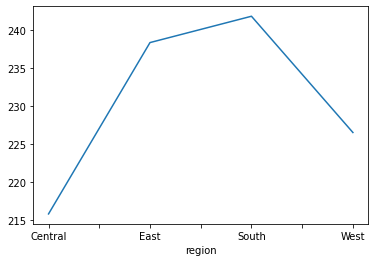

In [ ]:
df.groupby('region')['sales'].mean().plot()

На графике видим что в регионе South-Юг больше всего продаж.
  
Почему? Если Count в West-3203, а в South-1620, но среднее показывает что продаж больше в South.  
Что тогда Count и от чего он зависит?

In [ ]:
(df.groupby(['region','state','city'])
[['sales']]
 .agg(['count','mean']))

sales             
                                               count         mean
region  state                city                                
Central Illinois             Arlington Heights     1    14.112000
                             Aurora               34   222.734353
                             Bloomington           8   120.492500
                             Bolingbrook           6    36.384667
                             Buffalo Grove         2   415.699500
                             Carol Stream          5   261.162000
                             Champaign             1   151.960000
                             Chicago             314   154.584525
                             Danville              1    43.372000
                             Decatur              22   144.066955
                             Des Plaines           6   248.868667
                             Elmhurst              4   222.907000
                             Evanston              4   438.449750
                             Frankfort             2    48.816000
                             Freeport              4    53.955000
                             Glenview              1   158.376000
                             Highland Park         7   290.728000
                             Naperville            8   161.037875
                             Normal                1   366.744000
                             Oak Park              1    10.192000
                             Orland Park           1   339.960000
                             Oswego                3   107.326000
                             Palatine              1   116.312000
                             Park Ridge            3   228.333333
                             Peoria                7    71.640000
                             Quincy                9    36.698222
                             Rockford             11   287.838909
                             Romeoville            1     8.952000
                             Saint Charles         6   231.451667
                             Skokie               11    51.712000
                             Tinley Park           1    22.288000
                             Wheeling              3   245.714000
                             Woodstock             3   285.750000
        Indiana              Bloomington           7    86.257143
                             Columbus             34   234.129412
                             Elkhart               2    85.715000
                             Greenwood             4   416.262500
                             Indianapolis         23   404.626957
                             La Porte              8   127.667500
                             Lafayette            12  1635.870833
                             Lawrence             11   140.466364
                             Mishawaka             2   388.120000
                             New Albany            4    52.387500
                             New Castle            2    42.305000
                             Noblesville           4   772.795000
                             Portage               1    16.280000
                             Richmond             29   215.005172
                             South Bend            6   206.388333
        Iowa                 Burlington            3    19.143333
                             Cedar Rapids          1   278.400000
                             Des Moines           12   167.403333
                             Dubuque               3   562.433333
                             Iowa City             1     9.990000
                             Marion                6    59.726667
                             Urbandale             3    49.706667
                             Waterloo              1    30.320000
        Kansas               Garden City           5    62.476000
                             Manhattan             1   273.960000
                     

Мы знаем, что в регионе South больше всего продаж. Теперь нам стоит выявить хорошие продажи в штатах и городах:   
Alabama;Mobile(11-продаж/496-процентов)  
Alabama;Florence(5-продаж/399-процентов)   
Virginia;Harrisonburg(7-продаж/626-процентов)    
Virginia;Arlington(32-продаж/448-процентов)   


In [ ]:
(df.groupby(['region','state','city','segment','category','product_name'])
[['sales','quantity','profit']]
 .agg({'sales':['count','mean'],
       'quantity':['mean'],
       'profit':['mean']}))

sales  \
                                                                                                                              count   
region  state                city              segment     category        product_name                                               
Central Illinois             Arlington Heights Consumer    Office Supplies Newell 332                                             1   
                             Aurora            Consumer    Furniture       Balt Split Level Computer Training Table               1   
                                                                           Bevis Round Conference Table Top, X-Base               1   
                                                                           Electrix Halogen Magnifier Lamp                        1   
                                                                           Global Armless Task Chair, Royal Blue                  1   
                                                                           GuestStacker Chair with Chrome Finish Legs             1   
                                                                           Hon Comfortask Task/Swivel Chairs                      1   
                                                           Office Supplies Acme Tagit Stainless Steel Antibacterial Scissors      1   
                                                                           Airmail Envelopes                                      1   
                                                                           Quartet Omega Colored Chalk, 12/Pack                   1   
                                                                           SAFCO Commercial Wire Shelving, Black                  1   
                                                                           White Computer Printout Paper by Universal             1   
                                                                           Xerox 21                                               1   
                                                           Technology      Samsung Galaxy S4                                      1   
                                               Corporate   Furniture       Bevis Oval Conference Table, Walnut                    1   
                                                                           Flat Face Poster Frame                                 1   
                                                                           Global Ergonomic Managers Chair                        1   
                                                                           Hon 61000 Series Interactive Training Tables           1   
                                                           Office Supplies Acco Hot Clips Clips to Go                             1   
                                                                           Avery Poly Binder Pockets                              1   
                                                                           Catalog Binders with Expanding Posts                   1   
                                                                           Tops Wirebound Message Log Books                       1   
                                                           Technology      PowerGen Dual USB Car Charger                          1   
                                               Home Office Furniture       Global Troy Executive Leather Low-Back Tilter          1   
                                                                           Hon Rectangular Conference Tables                      1   
                                                                           Tenex "The Solids" Textured Chair Mats                 1   
                                                                           Tenex Chairmat w/ Average Lip, 45" x 53"               1   
                                                           Office Supplies A


Город, сегмент, категория, товар, процент продаж, кол. товара, выгода               

**Узнали какие товары лучше всего и где продались:  **

1.Florence,	Consumer,	Furniture	"High-Back Leather Manager's Chair" (1819,	14,	163)   
2.Florence,	Consumer, Office Supplies, "Canvas Sectional Post Binders" (1152,	6,	74)   
3.Mobile,	Consumer,	Furniture,	"Bretford CR8500 Series Meeting Room Furniture"	(1801,	2,	200)  
4.Mobile,	Consumer,	Furniture,	"Global Manager's Adjustable Task Chair, Storm"	(1056,	7,	306)   
5.Mobile, Corporate, Technology,	"Hewlett-Packard Deskjet 3050a All-in-One Color Inkjet Printer"	(3040,	8,	1459)  

**Узнали какие товары стоит избегать и где не стоит продавать:  **

1.Florence,	Consumer, Office Supplies,	"Acme Stainless Steel Office Snips"	(7.2,	1,	1.9)  
2.Florence,	Consumer, Office Supplies, "Ampad Phone Message Book, Recycled, 400 Message Capacity, 5 ¾” x 11”	(12.4,	2,	5.6)  
3.Florence, Home Office,	Office Supplies,	"Xerox 1949"	(4.9,	1,	2.4)  
4.Mobile,	Consumer,	Furniture, "Stacking Tray, Side-Loading, Legal, Smoke"	(8.9,	2,	2.7)  
5.Mobile,	Consumer, Office Supplies,	"Premium Transparent Presentation Covers by GBC"	(62.9,	3,	30.2)  
6.Mobile,	Consumer, Office Supplies, "Sanford Colorific Colored Pencils, 12/Box"	(25.9,	9,	7.7)  
7.Mobile,	Consumer, Technology,	"Anker Astro Mini 3000mAh Ultra-Compact Portable Charger"	(59.9,	3,	0.0)  
8.Mobile, Corporate,	Office Supplies, "Wilson Jones DublLock D-Ring Binders"	(33.7,	5,	16.8)
